In [0]:
# ライブラリのインポート
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR

In [0]:
# sin関数にノイズを追加して訓練データ(X,y)を作成
np.random.seed(seed=0) #乱数を固定
X = np.random.uniform(0, 4, 50)[:, np.newaxis]
y = np.sin(1/4 * 2 * np.pi * X ).ravel()+np.random.normal(0, 0.3, 50)

In [11]:
# ガウスカーネルを使いSVRモデルを訓練
model = SVR(kernel='rbf', C=10000, gamma=0.01, epsilon=0.3)
model.fit(X, y)

SVR(C=10000, cache_size=200, coef0=0.0, degree=3, epsilon=0.3, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

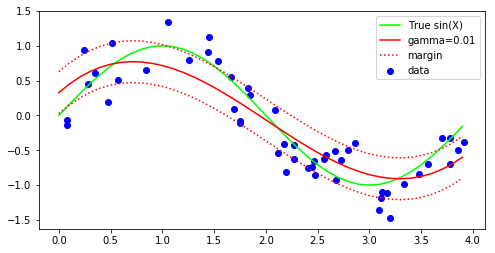

In [12]:
plt.figure(figsize=(8,4)) #プロットのサイズ指定

# プロット用にデータX_pltを作成
X_plt = np.arange(0, 4, 0.1)[:, np.newaxis]
# 正解のプロット
y_true = np.sin(1/4 * 2 * np.pi * X_plt ).ravel()
# モデルのプロット
y_pred = model.predict(X_plt)

# sin関数のSVRによるモデル化
plt.scatter(X, y, color='blue', label='data')
plt.plot(X_plt, y_true, color='lime', linestyle='-', label='True sin(X)')
plt.plot(X_plt, y_pred, color='red', linestyle='-', label='gamma=0.01')
plt.plot(X_plt, y_pred + model.epsilon, color='red', linestyle=':', label='margin')
plt.plot(X_plt, y_pred - model.epsilon, color='red', linestyle=':')
plt.legend(loc='upper right')

plt.show()